In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [6]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
2,flat,sohna road,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# luxury score

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='luxury_score'>

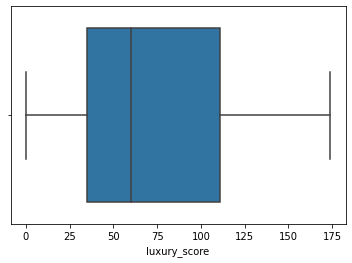

In [7]:
sns.boxplot(df['luxury_score'])

In [8]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [9]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [10]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,Low
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,Low
2,flat,sohna road,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,Low
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,Medium
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Low


# floorNum

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='floorNum'>

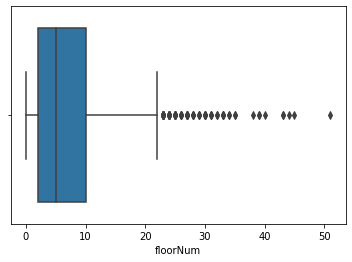

In [11]:
sns.boxplot(df['floorNum'])

In [12]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [13]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,Low,Mid Floor
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,Low,Low Floor
2,flat,sohna road,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,Low,High Floor
3,flat,sector 61,1.47,2.0,2.0,2,2.0,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,76.0,Medium,Low Floor
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Low,Mid Floor


In [15]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 7,0.45,2.0,2.0,1,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,Mid Floor
1,flat,sector 3,0.50,2.0,2.0,1,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
2,flat,sohna road,0.40,2.0,2.0,3,New Property,661.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,High Floor
3,flat,sector 61,1.47,2.0,2.0,2,New Property,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,Medium,Low Floor
4,flat,sector 92,0.70,2.0,2.0,3,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,Low,Mid Floor


In [22]:
data_label_encoded = train_df.copy()

In [23]:
data_label_encoded.isnull().sum()

property_type        0
sector               0
price                0
bedRoom              0
bathroom             0
balcony              0
agePossession        0
built_up_area      420
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_category    110
floor_category       0
dtype: int64

In [24]:
data_label_encoded.dropna(subset=['built_up_area','luxury_category'], inplace=True)

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
#data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [26]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,81.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,36.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,113.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,71.0,2.0,2.0,2.0,1.0,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,0.0,107.0,2.0,2.0,3.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,1.0,27.0,6.0,5.0,4.0,3.0,2430.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
3444,1.0,76.0,5.0,6.0,4.0,3.0,6667.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0
3445,1.0,27.0,4.0,4.0,4.0,0.0,2642.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0
3446,1.0,59.0,3.0,3.0,3.0,0.0,2259.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0


In [27]:
y_label

0        0.45
1        0.50
2        0.40
3        1.47
4        0.70
        ...  
3443     4.95
3444    19.00
3445     4.99
3446     7.10
3447     4.25
Name: price, Length: 3028, dtype: float64

# Technique 1 - Correlation Analysis

<Axes: >

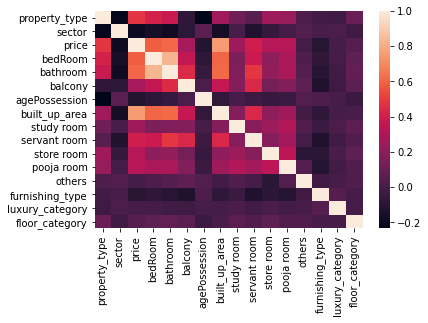

In [28]:
 sns.heatmap(data_label_encoded.corr())

In [29]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.194842
1,price,1.000000
2,bedRoom,0.583616
3,bathroom,0.607368
4,balcony,0.272330
5,agePossession,-0.121528
6,built_up_area,0.745959
7,study room,0.253136
8,servant room,0.401811
9,store room,0.324293


# Technique 2 - Random Forest Feature Importance

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.662160
1,sector,0.106174
0,property_type,0.097549
2,bedRoom,0.024586
3,bathroom,0.022931
8,servant room,0.018572
4,balcony,0.012312
5,agePossession,0.011753
12,furnishing_type,0.008745
7,study room,0.008224


# Technique 3 - Gradient Boosting Feature importances

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.691708
1,sector,0.105117
0,property_type,0.087574
3,bathroom,0.037431
2,bedRoom,0.037307
8,servant room,0.023534
7,study room,0.004189
9,store room,0.003990
12,furnishing_type,0.002869
4,balcony,0.001968


# Technique 4 - Permutation Importance

In [32]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.920626
1,sector,0.152445
0,property_type,0.148915
8,servant room,0.018138
2,bedRoom,0.009030
4,balcony,0.006273
14,floor_category,0.004723
3,bathroom,0.004421
7,study room,0.002862
11,others,0.001026


# Technique 5 - LASSO

In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.526333
0,property_type,0.677648
3,bathroom,0.300149
9,store room,0.223411
7,study room,0.185616
8,servant room,0.166787
10,pooja room,0.080904
13,luxury_category,0.013007
2,bedRoom,0.003150
11,others,-0.000000


# Technique 6 - RFE

In [35]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.664969
1,sector,0.108075
0,property_type,0.091230
3,bathroom,0.025787
2,bedRoom,0.025674
8,servant room,0.017703
5,agePossession,0.011887
4,balcony,0.011850
7,study room,0.008848
12,furnishing_type,0.008246


# Technique 7 - Linear Regression Weights

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.529018
0,property_type,0.675198
3,bathroom,0.307753
9,store room,0.227514
7,study room,0.194356
8,servant room,0.175356
10,pooja room,0.084463
13,luxury_category,0.023020
2,bedRoom,0.006119
11,others,-0.006179


# Technique 8 - SHAP

In [39]:
!pip install shap

     |████████████████████████████████| 453 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 10.3 MB/s  eta 0:00:01
     |████████████████████████████████| 301 kB 17.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.4.0 which is incompatible.


In [40]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.53074755e-01, -1.47495859e-02, -4.25384021e-02, ...,
        -1.00897032e-02, -5.19839476e-03, -1.39791527e-02],
       [-1.84127121e-01,  1.64232535e-01, -5.57929912e-02, ...,
         2.49085092e-02,  2.03751514e-03, -1.78663713e-02],
       [-1.76860423e-01, -4.29265915e-01, -4.14514919e-02, ...,
        -8.74076242e-03,  9.72902573e-04,  2.68928487e-02],
       ...,
       [ 1.12564821e+00, -8.76287193e-02, -6.71580098e-03, ...,
        -2.25331733e-02, -6.67207914e-03,  2.31086869e-02],
       [ 2.06044341e+00,  6.12484309e-01, -7.73642089e-03, ...,
        -2.17769479e-02, -1.43164301e-02,  1.47301084e-02],
       [ 1.65416864e+00,  5.20778971e-01,  1.14338144e-01, ...,
         3.81935347e-02,  1.85869859e-03, -4.48064964e-03]])

In [41]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.272897
0,property_type,0.454214
1,sector,0.385157
3,bathroom,0.099873
8,servant room,0.078250
2,bedRoom,0.049032
4,balcony,0.039743
14,floor_category,0.027457
12,furnishing_type,0.026156
5,agePossession,0.023332


In [42]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [43]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.194842,0.106174,0.105117,0.152445,-0.044325,0.108075,-0.052848,0.385157
bedRoom,0.583616,0.024586,0.037307,0.009030,0.003150,0.025674,0.006119,0.049032
bathroom,0.607368,0.022931,0.037431,0.004421,0.300149,0.025787,0.307753,0.099873
balcony,0.272330,0.012312,0.001968,0.006273,-0.030231,0.011850,-0.052860,0.039743
agePossession,-0.121528,0.011753,0.001324,-0.001867,-0.018593,0.011887,-0.026821,0.023332
built_up_area,0.745959,0.662160,0.691708,0.920626,1.526333,0.664969,1.529018,1.272897
study room,0.253136,0.008224,0.004189,0.002862,0.185616,0.008848,0.194356,0.021554
servant room,0.401811,0.018572,0.023534,0.018138,0.166787,0.017703,0.175356,0.078250
store room,0.324293,0.006301,0.003990,-0.000417,0.223411,0.004618,0.227514,0.016086


In [44]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [45]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.732707
sector             0.134885
bathroom           0.029399
bedRoom            0.025631
servant room       0.023979
balcony            0.010730
agePossession      0.007429
study room         0.007283
furnishing_type    0.007030
floor_category     0.006987
store room         0.004766
pooja room         0.003567
luxury_category    0.003313
others             0.002294
dtype: float64

In [46]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,81.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
1,0.0,36.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,113.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,71.0,2.0,2.0,2.0,1.0,1333.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,0.0,107.0,2.0,2.0,3.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,1.0,27.0,6.0,5.0,4.0,3.0,2430.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
3444,1.0,76.0,5.0,6.0,4.0,3.0,6667.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0
3445,1.0,27.0,4.0,4.0,4.0,0.0,2642.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0
3446,1.0,59.0,3.0,3.0,3.0,0.0,2259.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0


In [47]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [48]:
scores.mean()

0.7459249896750417

In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')


In [50]:
scores.mean()

0.7441516974462808

In [51]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [52]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [53]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,81.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,1.0,1.0,2.0,0.45
1,0.0,36.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,0.0,1.0,1.0,0.50
2,0.0,113.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,1.0,1.0,0.0,0.40
3,0.0,71.0,2.0,2.0,2.0,1.0,1333.0,0.0,0.0,1.0,2.0,1.0,1.47
4,0.0,107.0,2.0,2.0,3.0,4.0,1217.0,0.0,0.0,1.0,1.0,2.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,1.0,27.0,6.0,5.0,4.0,3.0,2430.0,1.0,0.0,1.0,2.0,2.0,4.95
3444,1.0,76.0,5.0,6.0,4.0,3.0,6667.0,1.0,1.0,0.0,2.0,2.0,19.00
3445,1.0,27.0,4.0,4.0,4.0,0.0,2642.0,1.0,1.0,1.0,1.0,2.0,4.99
3446,1.0,59.0,3.0,3.0,3.0,0.0,2259.0,1.0,0.0,1.0,2.0,1.0,7.10
